In [15]:
import tarfile
file = tarfile.open('./BraTS2021_Training_Data.tar')

file.extractall('./brain_images')
file.close()

In [1]:
import tarfile
import SimpleITK as sitk
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import torch
import gzip
import random
import os
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor, nn
import sys
from tqdm import tqdm
from statistics import mean
from torch.optim import Adam
from natsort import natsorted
import matplotlib.pyplot as plt
from transformers import SamModel 
import matplotlib.patches as patches
from transformers import SamProcessor
from IPython.display import clear_output
from torch.utils.data import Dataset, DataLoader
from torch.nn.functional import threshold, normalize
import torch.utils.data as data
import torch.utils.model_zoo as model_zoo
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import glob
import monai
import math
from typing import Any, Optional, Tuple, Type
from typing import Type
from PIL import Image

from segment_anything import sam_model_registry
from segment_anything import SamAutomaticMaskGenerator
from segment_anything import SamPredictor

%matplotlib inline

from monai.transforms import (
    EnsureChannelFirstd,
    EnsureTyped,
    Compose,
    CropForegroundd,
    CopyItemsd,
    LoadImaged,
    CenterSpatialCropd,
    Invertd,
    OneOf,
    Orientationd,
    MapTransform,
    NormalizeIntensityd,
    RandSpatialCropSamplesd,
    CenterSpatialCropd,
    RandSpatialCropd,
    SpatialPadd,
    ScaleIntensityRanged,
    Spacingd,
    RepeatChanneld,
    RandRotated,
    RandFlipd,
    ToTensord,
)

2023-12-08 01:14:28.851047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 01:14:28.851095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 01:14:28.852586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 01:14:28.859269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 01:14:29.412872: W tensorflow/compiler/tf2

In [2]:
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage.transform import rotate
from skimage.util import montage
import os
from sklearn.model_selection import train_test_split
import keras
import cv2
import tensorflow
import random
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import numpy as np
from keras.callbacks import CSVLogger
import keras.backend as K
import zipfile
import pandas as pd

In [26]:
import os
i=1

file_path = './brain_images'

file_list = os.listdir(file_path)
file_list.remove('.DS_Store')
#file_list.remove('.ipynb_checkpoints')
file_list = sorted(file_list)
for name in file_list :
    file_src = os.path.join(file_path, name)
    file_dst = os.path.join(file_path, 'BraTS2021_' + str(i))
    os.rename(file_src, file_dst)
    #print(file_src, file_dst)
    
    t1_src = os.path.join(file_path, 'BraTS2021_' + str(i), name + '_t1.nii.gz')
    #t1_dst = os.path.join('t1_images', 'BraTS2021_' + str(i) + '_t1.nii.gz')
    t1_dst = os.path.join(file_path, 'BraTS2021_' + str(i),'BraTS2021_' + str(i) + '_t1.nii.gz')
    
    t2_src = os.path.join(file_path, 'BraTS2021_' + str(i), name + '_t2.nii.gz')
    #t2_dst = os.path.join('t2_images', 'BraTS2021_' + str(i) + '_t2.nii.gz')
    t2_dst = os.path.join(file_path, 'BraTS2021_' + str(i), 'BraTS2021_' + str(i) + '_t2.nii.gz')
    
    t1ce_src = os.path.join(file_path, 'BraTS2021_' + str(i), name + '_t1ce.nii.gz')
    #t1ce_dst = os.path.join('t1ce_images', 'BraTS2021_' + str(i) + '_t1ce.nii.gz')
    t1ce_dst = os.path.join(file_path, 'BraTS2021_' + str(i), 'BraTS2021_' + str(i) + '_t1ce.nii.gz')
    
    flair_src = os.path.join(file_path, 'BraTS2021_' + str(i), name + '_flair.nii.gz')
    #flair_dst = os.path.join('flair_images', 'BraTS2021_' + str(i) + '_flair.nii.gz')
    flair_dst = os.path.join(file_path, 'BraTS2021_' + str(i), 'BraTS2021_' + str(i) + '_flair.nii.gz')
    
    seg_src = os.path.join(file_path, 'BraTS2021_' + str(i), name + '_seg.nii.gz')
    #seg_dst = os.path.join('seg_images', 'BraTS2021_' + str(i) + '_seg.nii.gz')
    seg_dst = os.path.join(file_path, 'BraTS2021_' + str(i), 'BraTS2021_' + str(i) + '_seg.nii.gz')
    

    os.rename(t1_src, t1_dst)
    os.rename(t2_src, t2_dst)
    os.rename(t1ce_src, t1ce_dst)
    os.rename(flair_src, flair_dst)
    os.rename(seg_src, seg_dst)
    
    i += 1
    if i == 1251 :
        break
print('fin')

fin


In [3]:
images = sorted(os.listdir('/home/kwonhwi/DeepLearning_project/brain_images'), reverse = False)

len(images)

1251

In [3]:
data_dir = './brain_images'
t1_images = sorted(os.listdir('/home/kwonhwi/DeepLearning_project/t1_images'), reverse = False)
t2_images = sorted(os.listdir('/home/kwonhwi/DeepLearning_project/t2_images'), reverse = False)
t1ce_images = sorted(os.listdir('/home/kwonhwi/DeepLearning_project/t1ce_images'), reverse = False)
flair_images = sorted(os.listdir('/home/kwonhwi/DeepLearning_project/flair_images'), reverse = False)
labels = sorted(os.listdir('/home/kwonhwi/DeepLearning_project/seg_images'), reverse = False)

print('No. of T1 images:', len(t1_images))
print('No. of T2 images:', len(t2_images))
print('No. of T1ce images:', len(t1ce_images))
print('No. of Flair images:', len(flair_images))
print('No. of Labels:', len(labels))

No. of T1 images: 1199
No. of T2 images: 1199
No. of T1ce images: 1199
No. of Flair images: 1199
No. of Labels: 1199


In [3]:
base_dir = './project_dataset'
datasets = ['train', 'val', 'test']
data_types = ['2d_images', '2d_masks']

dir_paths = {}
for dataset in datasets:
    for data_type in data_types:
        # directory path 생성 후 directory 만들기
        dir_path = os.path.join(base_dir, f'{dataset}_{data_type}')
        dir_paths[f'{dataset}_{data_type}'] = dir_path
        
        os.makedirs(dir_path, exist_ok=True)

In [7]:
for idx, (t1_path, t2_path, t1ce_path, flair_path, mask_path) in enumerate(zip(t1_images, t2_images, t1ce_images, flair_images, labels)):
    # Load the 3D image and mask
    t1_img = sitk.ReadImage(os.path.join("./t1_images", t1_path))
    t2_img = sitk.ReadImage(os.path.join("./t2_images", t2_path))
    t1ce_img = sitk.ReadImage(os.path.join("./t1ce_images", t1ce_path))
    flair_img = sitk.ReadImage(os.path.join("./flair_images", flair_path))
    mask = sitk.ReadImage(os.path.join("./seg_images", mask_path))
    print('processing patient', idx, t1_img.GetSize(), t2_img.GetSize(), t1ce_img.GetSize(), flair_img.GetSize(),mask.GetSize())

    # mask data shape 변경
    mask_data = sitk.GetArrayFromImage(mask)
    mask_data = mask_data.transpose(2, 1, 0)
    
    if idx <= 960:  # Training
        img_dir = dir_paths['train_2d_images']
        mask_dir = dir_paths['train_2d_masks']
    elif 960 < idx <= 1080:  # Validation
        img_dir = dir_paths['val_2d_images']
        mask_dir = dir_paths['val_2d_masks']
    else:  # Testing
        img_dir = dir_paths['test_2d_images']
        mask_dir = dir_paths['test_2d_masks']

    # img, mask를 z축으로 자르기 - 2차원으로 만든 뒤 저장
    for i in range(t1_img.GetSize()[2]):
        # mask value가 있을 때만 save
        if np.any(mask_data[:, :, i]):
            t1_img_slice = t1_img[:, :, i]
            t2_img_slice = t2_img[:, :, i]
            t1ce_img_slice = t1ce_img[:, :, i]
            flair_img_slice = flair_img[:, :, i]
            mask_slice = mask[:, :, i]
            
            t1_img_slice_path = os.path.join(img_dir, f"{os.path.basename(t1_path).replace('.nii.gz', '')}_{i}.nii.gz")
            t2_img_slice_path = os.path.join(img_dir, f"{os.path.basename(t2_path).replace('.nii.gz', '')}_{i}.nii.gz")
            t1ce_img_slice_path = os.path.join(img_dir, f"{os.path.basename(t1ce_path).replace('.nii.gz', '')}_{i}.nii.gz")
            flair_img_slice_path = os.path.join(img_dir, f"{os.path.basename(flair_path).replace('.nii.gz', '')}_{i}.nii.gz")
            mask_slice_path = os.path.join(mask_dir, f"{os.path.basename(mask_path).replace('.nii.gz', '')}_{i}.nii.gz")

            sitk.WriteImage(t1_img_slice, t1_img_slice_path)
            sitk.WriteImage(t2_img_slice, t2_img_slice_path)
            sitk.WriteImage(t1ce_img_slice, t1ce_img_slice_path)
            sitk.WriteImage(flair_img_slice, flair_img_slice_path)
            sitk.WriteImage(mask_slice, mask_slice_path)  
 

processing patient 0 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)
processing patient 1 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)
processing patient 2 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)
processing patient 3 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)
processing patient 4 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)
processing patient 5 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)
processing patient 6 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)
processing patient 7 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)
processing patient 8 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155)
processing patient 9 (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 240, 155) (240, 

In [4]:
# Specify path of our BraTS2020 directory
data_path = "/home/kwonhwi/DeepLearning_project/brain_images"

# Retrieve all samples from path with listdir(). This method lists of all files + directories in the specified directory.
samples = os.listdir(data_path)
print("Number of samples:", len(samples))

Number of samples: 1251


In [5]:
samples_train, samples_val = train_test_split(samples, test_size=0.2, random_state=42)

# Split the train set into the real train set and in a test set 
samples_train, samples_test = train_test_split(samples_train, test_size=0.15, random_state=42)

# Print data distribution (Train: 68%, Test: 12%, Val: 20%)
print(f"Train length: {len(samples_train)}")
print(f"Validation length: {len(samples_val)}")
print(f"Test length: {len(samples_test)}")

Train length: 850
Validation length: 251
Test length: 150


In [6]:
VOLUME_START_AT = 60 
VOLUME_SLICES = 75 

In [7]:
# DataGenerator from Rastislav's notebook, https://www.kaggle.com/code/rastislav/3d-mri-brain-tumor-segmentation-u-net
IMG_SIZE = 128

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 4, shuffle=True):
        'Initialization'
        self.dim = dim # Resized image dimensions (128 x 128)
        self.batch_size = batch_size #  Number of images to load each time
        self.list_IDs = list_IDs # Patients IDs
        self.n_channels = n_channels # Number of channels (T1CE + FLAIR)
        self.shuffle = shuffle # Indicates if data is shuffled for each epoch
        self.on_epoch_end() # Updates indexes after each epoch

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Load & Generate data
        X, y = self.__data_generation(Batch_ids)

        return X, y
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples'
        # Initialization
        X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size*VOLUME_SLICES, 240, 240))

        # Generate data
        for c, i in enumerate(Batch_ids):
            
            # Get path of each RMI modality and the segmentation
            sample_path = os.path.join(data_path, str(i), str(i))
            t1ce_path = sample_path + '_t1ce.nii.gz'
            flair_path = sample_path + '_flair.nii.gz'
            seg_path = sample_path + '_seg.nii.gz'
            t1_path = sample_path + '_t1.nii.gz'
            t2_path = sample_path + '_t2.nii.gz'
            
            # Extract the data from these paths
            t1ce = nib.load(t1ce_path).get_fdata()
            flair = nib.load(flair_path).get_fdata()
            seg = nib.load(seg_path).get_fdata()
            t1 = nib.load(t1_path).get_fdata()
            t2 = nib.load(t2_path).get_fdata()
        
            for j in range(VOLUME_SLICES):
                 X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                 X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(t1ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                 X[j +VOLUME_SLICES*c,:,:,2] = cv2.resize(t1[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                 X[j +VOLUME_SLICES*c,:,:,3] = cv2.resize(t2[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                 
                 y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT]
                    
        # Masks / Segmentations
        y[y==4] = 3
        mask = tensorflow.one_hot(y, 4)
        Y = tensorflow.image.resize(mask, (IMG_SIZE, IMG_SIZE))
        
        # Scale data between 0 and 1 (since the minimum value in the data is 0)
        return X/np.max(X), Y
        
training_generator = DataGenerator(samples_train)
valid_generator = DataGenerator(samples_val)
test_generator = DataGenerator(samples_test)


In [5]:
""" Full assembly of the parts to form the complete network """

from unet_parts import *


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = (DoubleConv(n_channels, 64))
        self.down1 = (Down(64, 128))
        self.down2 = (Down(128, 256))
        self.down3 = (Down(256, 512))
        factor = 2 if bilinear else 1
        self.down4 = (Down(512, 1024 // factor))
        self.up1 = (Up(1024, 512 // factor, bilinear))
        self.up2 = (Up(512, 256 // factor, bilinear))
        self.up3 = (Up(256, 128 // factor, bilinear))
        self.up4 = (Up(128, 64, bilinear))
        self.outc = (OutConv(64, n_classes))

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

    def use_checkpointing(self):
        self.inc = torch.utils.checkpoint(self.inc)
        self.down1 = torch.utils.checkpoint(self.down1)
        self.down2 = torch.utils.checkpoint(self.down2)
        self.down3 = torch.utils.checkpoint(self.down3)
        self.down4 = torch.utils.checkpoint(self.down4)
        self.up1 = torch.utils.checkpoint(self.up1)
        self.up2 = torch.utils.checkpoint(self.up2)
        self.up3 = torch.utils.checkpoint(self.up3)
        self.up4 = torch.utils.checkpoint(self.up4)
        self.outc = torch.utils.checkpoint(self.outc)

In [8]:
def build_unet(inputs, ker_init, dropout):
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)
    
    pool = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)
    
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
    drop5 = Dropout(dropout)(conv5)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(drop5))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv8))
    merge9 = concatenate([conv,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)
    
    up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv9))
    merge = concatenate([conv1,up], axis = 3)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    conv10 = Conv2D(4, 1, activation = 'softmax')(conv)

    return Model(inputs = inputs, outputs = conv10)

In [9]:
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 4
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
    return total_loss

def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [10]:
input_layer = Input((IMG_SIZE, IMG_SIZE, 4))

# Build and compile the model
model = build_unet(input_layer, 'he_normal', 0.2)

model.compile(loss="categorical_crossentropy", optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tensorflow.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity] )


2023-12-06 00:56:09.004120: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-06 00:56:09.073608: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-06 00:56:09.073831: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [11]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1),
    
    keras.callbacks.ModelCheckpoint(filepath = 'model_.{epoch:02d}-{val_loss:.6f}.m5',
                             verbose=1, save_best_only=True, save_weights_only = True),

    CSVLogger('training.log', separator=',', append=False)
]

In [13]:
model.fit(training_generator,
          epochs=40,
          steps_per_epoch=len(samples_train),
          callbacks=callbacks,
          validation_data=valid_generator)
model.save_weights('brain_unet_weights.h5')

Epoch 1/40
850/850 [==============================] - ETA: 0s - loss: 0.0968 - accuracy: 0.9814 - mean_io_u: 0.5608 - dice_coef: 0.2956 - precision: 0.9841 - sensitivity: 0.9718 - specificity: 0.9951
Epoch 1: val_loss improved from inf to 0.05799, saving model to model_.01-0.057987.m5
850/850 [==============================] - 558s 657ms/step - loss: 0.0968 - accuracy: 0.9814 - mean_io_u: 0.5608 - dice_coef: 0.2956 - precision: 0.9841 - sensitivity: 0.9718 - specificity: 0.9951 - val_loss: 0.0580 - val_accuracy: 0.9838 - val_mean_io_u: 0.7959 - val_dice_coef: 0.3256 - val_precision: 0.9906 - val_sensitivity: 0.9786 - val_specificity: 0.9968 - lr: 0.0010
Epoch 2/40
850/850 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9830 - mean_io_u: 0.4874 - dice_coef: 0.3300 - precision: 0.9872 - sensitivity: 0.9790 - specificity: 0.9957
Epoch 2: val_loss improved from 0.05799 to 0.05415, saving model to model_.02-0.054152.m5
850/850 [==============================] - 559s 

In [14]:
model = model.load_weights('brain_unet_weights.h5')

In [18]:
def predict_segmentation(sample_path):
    # Load NIfTI (.nii) files of the sample (patient)
    t1ce_path = sample_path + '_t1ce.nii.gz'
    flair_path = sample_path + '_flair.nii.gz'
    t1_path = sample_path + '_t1.nii.gz'
    t2_path = sample_path + '_t2.nii.gz'
            
    # Extract the data from these paths
    t1ce = nib.load(t1ce_path).get_fdata()
    flair = nib.load(flair_path).get_fdata()
    t1 = nib.load(t1_path).get_fdata()
    t2 = nib.load(t2_path).get_fdata()
    # Create an empty array
    X = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 4))
    
    # Perform the same operations as our DataGenerator, to keep the same input shape
    for j in range(VOLUME_SLICES):
        X[j,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        X[j,:,:,1] = cv2.resize(t1ce[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        X[j,:,:,2] = cv2.resize(t1[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        X[j,:,:,3] = cv2.resize(t2[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        
    # Send our images to the CNN model and return predicted segmentation 
    return model.predict(X/np.max(X), verbose=1)

In [19]:
def show_predicted_segmentations(samples_list, slice_to_plot, cmap, norm):
    # Choose a random patient
    random_sample = random.choice(samples_list)
    
    # Get path of this patient
    random_sample_path = os.path.join(data_path, random_sample, random_sample)
    
    # Predict patient's segmentation
    predicted_seg = predict_segmentation(random_sample_path)
   
    # Load patient's original segmentation (Ground truth)
    seg_path = random_sample_path + '_seg.nii.gz'
    seg = nib.load(seg_path).get_fdata()
    
    # Resize original segmentation to the same dimensions of the predictions. (Add VOLUME_START_AT because original segmentation contains 155 slices vs only 75 for our prediction)
    seg=cv2.resize(seg[:,:,slice_to_plot+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)
    
    # Differentiate segmentations by their labels
    all = predicted_seg[slice_to_plot,:,:,1:4] # Deletion of class 0 (Keep only Core + Edema + Enhancing classes)
    zero = predicted_seg[slice_to_plot,:,:,0] # Isolation of class 0, Background (kind of useless, it is the opposite of the "all")
    first = predicted_seg[slice_to_plot,:,:,1] # Isolation of class 1, Core
    second = predicted_seg[slice_to_plot,:,:,2] # Isolation of class 2, Edema
    third = predicted_seg[slice_to_plot,:,:,3] # Isolation of class 3, Enhancing

    # Plot Original segmentation & predicted segmentation
    print("Patient number: ", random_sample)
    fig, axstest = plt.subplots(1, 6, figsize=(25, 20))

    # Original segmentation
    axstest[0].imshow(seg, cmap, norm)
    axstest[0].set_title('Original Segmentation')
    
    # Layers 1, 2, 3
    axstest[1].imshow(all)
    axstest[1].set_title('Predicted Segmentation - all layers')
    
        # Layer 0
    axstest[2].imshow(zero)
    axstest[2].set_title('Predicted Segmentation - layer 0')
    
    # Layer 1
    axstest[3].imshow(first)
    axstest[3].set_title('Predicted Segmentation - layer 1')
    
    # Layer 2
    axstest[4].imshow(second)
    axstest[4].set_title('Predicted Segmentation - layer 2')
    
    # Layer 3
    axstest[5].imshow(third)
    axstest[5].set_title('Predicted Segmentation - layer 3')
    
    # Add space between subplots
    plt.subplots_adjust(wspace=0.8)

    plt.show()

3/3 [==============================] - 0s 16ms/step
Patient number:  BraTS2021_350


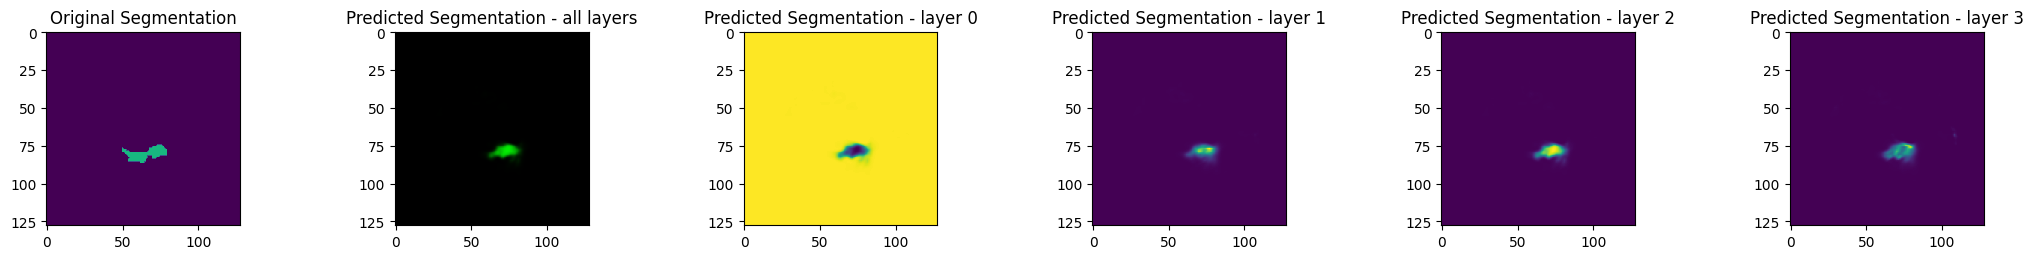

In [40]:
cmap = mpl.colors.ListedColormap(['#440054', '#3b528b', '#18b880', '#e6d74f'])
norm = mpl.colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)

show_predicted_segmentations(samples_test, 30, cmap, norm)

In [45]:
from keras.utils import plot_model

#plot
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [48]:
from tensorflow.keras.models import Model
import tensorflow as tf

def VizGradCAM(model, image, interpolant=0.5, plot_results=True):
    
    """VizGradCAM - Displays GradCAM based on Keras / TensorFlow models
    using the gradients from the last convolutional layer. This function
    should work with all Keras Application listed here:
    https://keras.io/api/applications/
    Parameters:
    model (keras.model): Compiled Model with Weights Loaded
    image: Image to Perform Inference On
    plot_results (boolean): True - Function Plots using PLT
                            False - Returns Heatmap Array
    Returns:
    Heatmap Array?
    """
    #sanity check
    assert (interpolant > 0 and interpolant < 1), "Heatmap Interpolation Must Be Between 0 - 1"

    #STEP 1: Preprocesss image and make prediction using our model
    #input image
    original_img = np.asarray(image, dtype = np.float32)
    #expamd dimension and get batch size
    img = np.expand_dims(original_img, axis=0)
    #predict
    prediction = model.predict(img)
    #prediction index
    prediction_idx = np.argmax(prediction)

    #STEP 2: Create new model
    #specify last convolutional layer
    last_conv_layer = next(x for x in model.layers[::-1] if isinstance(x, K.layers.Conv2D))
    target_layer = model.get_layer(last_conv_layer.name)
    
    #compute gradient of top predicted class
    with tf.GradientTape() as tape:
        #create a model with original model inputs and the last conv_layer as the output
        gradient_model = Model([model.inputs], [target_layer.output, model.output])
        #pass the image through the base model and get the feature map  
        conv2d_out, prediction = gradient_model(img)
        #prediction loss
        loss = prediction[:, prediction_idx]

    #gradient() computes the gradient using operations recorded in context of this tape
    gradients = tape.gradient(loss, conv2d_out)

    #obtain the output from shape [1 x H x W x CHANNEL] -> [H x W x CHANNEL]
    output = conv2d_out[0]

    #obtain depthwise mean
    weights = tf.reduce_mean(gradients[0], axis=(0, 1))


    #create a 7x7 map for aggregation
    activation_map = np.zeros(output.shape[0:2], dtype=np.float32)
    #multiply weight for every layer
    for idx, weight in enumerate(weights):
        activation_map += weight * output[:, :, idx]
    #resize to image size
    activation_map = cv2.resize(activation_map.numpy(), 
                                (original_img.shape[1], 
                                 original_img.shape[0]))
    #ensure no negative number
    activation_map = np.maximum(activation_map, 0)
    #convert class activation map to 0 - 255
    activation_map = (activation_map - activation_map.min()) / (activation_map.max() - activation_map.min())
    #rescale and convert the type to int
    activation_map = np.uint8(255 * activation_map)


    #convert to heatmap
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)
    
    #superimpose heatmap onto image
    original_img = np.uint8((original_img - original_img.min()) / (original_img.max() - original_img.min()) * 255)
    cvt_heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    cvt_heatmap = img_to_array(cvt_heatmap)

    #enlarge plot
    plt.rcParams["figure.dpi"] = 100

    if plot_results == True:
        plt.imshow(np.uint8(original_img * interpolant + cvt_heatmap * (1 - interpolant)))
    else:
        return cvt_heatmap

In [80]:
random_sample = random.choice(samples_test)

# Get path of this patient
random_sample_path = os.path.join(data_path, random_sample, random_sample)

# Predict patient's segmentation
predicted_seg = predict_segmentation(random_sample_path)

# Load patient's original segmentation (Ground truth)
seg_path = random_sample_path + '_seg.nii.gz'
seg = nib.load(seg_path).get_fdata()

# Resize original segmentation to the same dimensions of the predictions. (Add VOLUME_START_AT because original segmentation contains 155 slices vs only 75 for our prediction)
seg=cv2.resize(seg[:,:,30+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)

# Differentiate segmentations by their labels
all = predicted_seg[30,:,:,0:4] # Deletion of class 0 (Keep only Core + Edema + Enhancing classes)
zero = predicted_seg[30,:,:,0] # Isolation of class 0, Background (kind of useless, it is the opposite of the "all")
first = predicted_seg[30,:,:,1] # Isolation of class 1, Core
second = predicted_seg[30,:,:,2] # Isolation of class 2, Edema
third = predicted_seg[30,:,:,3] # Isolation of class 3, Enhancing

3/3 [==============================] - 0s 16ms/step


In [77]:
formatted.shape

(128, 128, 3)

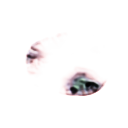

In [81]:
from PIL import Image
import numpy as np

slice56 = np.random.random((226, 226))

# convert values to 0 - 255 int8 format
formatted = ((all * 255 / np.max(all))).astype(np.uint8)
img = Image.fromarray(formatted)
img

In [88]:
import tensorflow.keras
VizGradCAM(model, img_to_array(img), plot_results=True)

1/1 [==============================] - 0s 23ms/step


AttributeError: module 'keras.backend' has no attribute 'layers'

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
def display_gradcam_with_img(img, heatmap, alpha=0.4):
    # 0과 1 사이의 값을 갖는 행렬 -> 0과 255 사이의 정수를 갖는 행렬
    heatmap = np.uint8(255 * heatmap)

    # 이쁜 히트맵을 위한 칼라맵 설정
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]  # 0~255에 대응하는 RGB 값 불러오기 [256, 3]
    jet_heatmap = jet_colors[heatmap]  # RGB 이미지가 됨 (왜 그렇게 되는지는 굉장히 어려워 보임 ...)

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)  # 행렬을 이미지로 바꿔주기 (이미지 크기 바꾸기 위해)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))     # 히트맵 사이즈를 이미지 크기로 바꿔주기
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)  # 이미지를 행렬로 바꿔주기

    superimposed_img = jet_heatmap * alpha + img  # 히트맵과 이미지 겹치기 (덧셈 연산으로 가능)
    superimposed_img = np.uint8(superimposed_img)

    # 그림 그려
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img)  # 원본 이미지 그려
    axes[1].imshow(heatmap)  # 히트맵 그려
    axes[2].imshow(superimposed_img)  # 겹친 이미지 그려
    for ax in axes:
        ax.axis('off')  # 축에 눈금이랑 숫자 다 없애

img = X_test[1]
heatmap =  make_gradcam_heatmap(img[np.newaxis], model, 'max_pooling2d_1')
k = display_gradcam_with_img(255 * img, heatmap, alpha=0.8)